# LSTM Deep Learning Bitcoin Trading Model 
### Author: Aditya Vikram Singh <myavikram@gmail.com>

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd
import datetime

%matplotlib inline
plt.style.use('fivethirtyeight')

from sklearn.metrics import mean_squared_error

from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential

Using TensorFlow backend.


In [8]:
from datetime import datetime

In [2]:
from binance.client import Client 

api_key = 'paste your keys here'
api_secret = 'paste your keys here'


client = Client(api_key, api_secret)

In [3]:
candles = client.get_klines(symbol='BTCUSDT', interval=Client.KLINE_INTERVAL_1MINUTE)

In [4]:
len(candles)

500

In [5]:
candles[499] #time-open-high-low-close-volume-close_time

[1586176440000,
 '7119.53000000',
 '7119.86000000',
 '7113.54000000',
 '7118.13000000',
 '25.95068600',
 1586176499999,
 '184667.17690179',
 372,
 '12.29807200',
 '87518.83954070',
 '0']

In [6]:
price = np.array([float(candles[i][4]) for i in range(500)])

In [9]:
time = np.array([int(candles[i][0]) for i in range(500)])

t = np.array([datetime.fromtimestamp(time[i]/1000).strftime('%H:%M:%S') for i in range(500)])

In [7]:
price.shape

(500,)

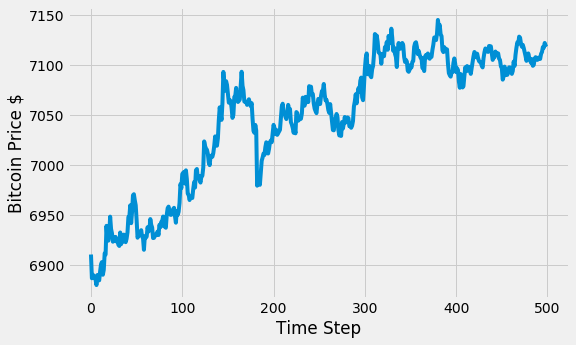

In [10]:
plt.figure(figsize=(8,5));
plt.xlabel('Time Step');
plt.ylabel('Bitcoin Price $')
plt.plot(price);

In [11]:
timeframe = pd.DataFrame({'Time':t,'Price $BTC':price})

timeframe #minute by minute price 

,Time,Price $BTC
0,09:45:00,6910.26
1,09:46:00,6886.50
2,09:47:00,6890.00
3,09:48:00,6889.12
4,09:49:00,6887.33
...,...,...
495,18:00:00,7117.90
496,18:01:00,7117.19
497,18:02:00,7121.99
498,18:03:00,7119.23


In [12]:
price = price.reshape(500,1)

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [15]:
scaler.fit(price[:374])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [16]:
price = scaler.transform(price)

In [17]:
df = pd.DataFrame(price.reshape(100,5),columns=['First','Second','Third','Fourth','Target'])

In [18]:
df.head()

,First,Second,Third,Fourth,Target
0,-1.700224,-2.053476,-2.001440,-2.014523,-2.041136
1,-2.074885,-2.154426,-2.005900,-2.060018,-2.084846
2,-1.952526,-1.845331,-1.812474,-2.001142,-1.929184
3,-1.682383,-1.700373,-1.273378,-1.469332,-1.494458
4,-1.390088,-1.136746,-1.319468,-1.384885,-1.509623


### Train Test Split 

In [19]:
#75% train , 25% test

x_train = df.iloc[:74,:4]
y_train = df.iloc[:74,-1]

x_test = df.iloc[75:99,:4]
y_test = df.iloc[75:99,-1]

In [20]:
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

In [21]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test  = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [22]:
x_train.shape , x_test.shape

((74, 4, 1), (24, 4, 1))

In [77]:
model = Sequential()

model.add(LSTM(20, return_sequences=True, input_shape=(4, 1)))
model.add(LSTM(40, return_sequences=False))
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='rmsprop')

model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_15 (LSTM)               (None, 4, 20)             1760      
_________________________________________________________________
lstm_16 (LSTM)               (None, 40)                9760      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 41        
Total params: 11,561
Trainable params: 11,561
Non-trainable params: 0
_________________________________________________________________


In [78]:
model.fit(x_train, y_train, batch_size=5,epochs=100)

Epoch 1/100
74/74 [==============================] - 1s 14ms/step - loss: 0.8887
Epoch 2/100
74/74 [==============================] - 0s 1ms/step - loss: 0.4343
Epoch 3/100
74/74 [==============================] - 0s 1ms/step - loss: 0.1061
Epoch 4/100
74/74 [==============================] - 0s 1ms/step - loss: 0.0489
Epoch 5/100
74/74 [==============================] - 0s 1ms/step - loss: 0.0440
Epoch 6/100
74/74 [==============================] - 0s 1ms/step - loss: 0.0439
Epoch 7/100
74/74 [==============================] - 0s 1ms/step - loss: 0.0441
Epoch 8/100
74/74 [==============================] - 0s 1ms/step - loss: 0.0407
Epoch 9/100
74/74 [==============================] - 0s 1ms/step - loss: 0.0418
Epoch 10/100
74/74 [==============================] - 0s 1ms/step - loss: 0.0405
Epoch 11/100
74/74 [==============================] - 0s 1ms/step - loss: 0.0404
Epoch 12/100
74/74 [==============================] - 0s 1ms/step - loss: 0.0400
Epoch 13/100
74/74 [================

In [79]:
y_pred = model.predict(x_test)

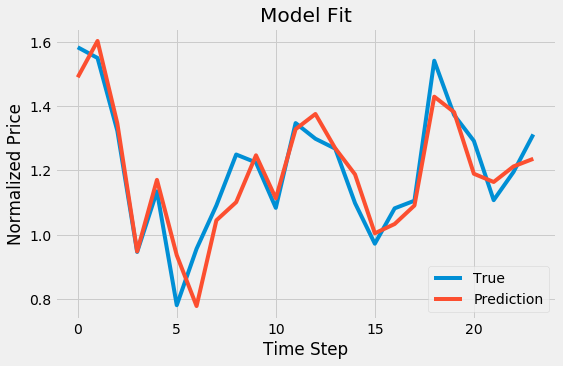

In [80]:
plt.figure(figsize=[8,5])
plt.title('Model Fit')
plt.xlabel('Time Step')
plt.ylabel('Normalized Price')
plt.plot(y_test, label='True')
plt.plot(y_pred, label='Prediction')
plt.legend()

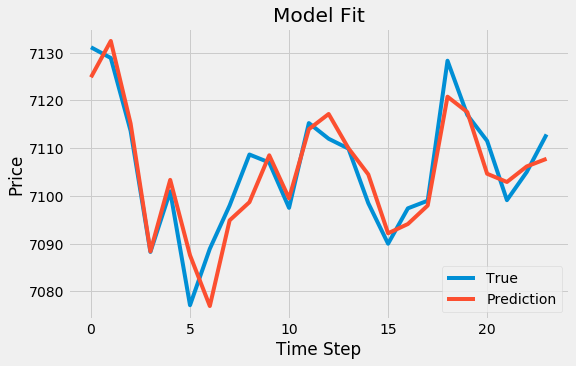

In [81]:
plt.figure(figsize=[8,5])
plt.title('Model Fit')
plt.xlabel('Time Step')
plt.ylabel('Price')
plt.plot(scaler.inverse_transform(y_test), label='True')
plt.plot(scaler.inverse_transform(y_pred), label='Prediction')
plt.legend()

In [82]:
testScore = np.sqrt(mean_squared_error(scaler.inverse_transform(y_test),scaler.inverse_transform(y_pred)))
print('Test Score: %.2f RMSE' % (testScore))

Test Score: 5.23 RMSE


In [83]:
from sklearn.metrics import r2_score

In [84]:
print('RSquared :','{:.2%}'.format(r2_score(y_test,y_pred)))

RSquared : 84.13%


In [85]:
model.save("Bitcoin_model.h5")

In [ ]:
#from keras.models import load_model

# load model
#model = load_model('Bitcoin_model.h5')


# summarize model.
#model.summary()

# Second Model 

In [31]:
from sklearn.svm import SVR

In [32]:
#75% train , 25% test

trainX = df.iloc[:74,:4]
trainY = df.iloc[:74,-1]

testX = df.iloc[75:99,:4]
testY = df.iloc[75:99,-1]

In [33]:
svr_linear = SVR(kernel='linear',C=1e3, gamma=0.1)
svr_linear.fit(trainX,trainY)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [34]:
predY = svr_linear.predict(testX) 

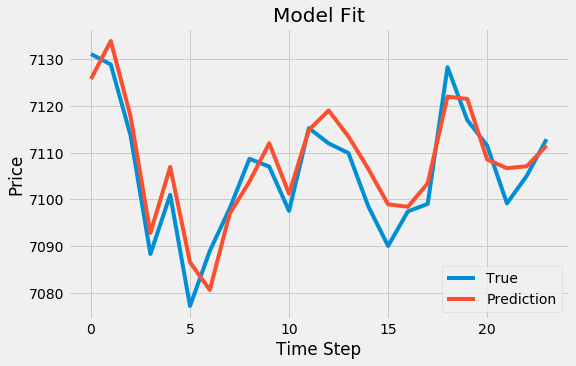

In [35]:
plt.figure(figsize=[8,5])
plt.title('Model Fit')
plt.xlabel('Time Step')
plt.ylabel('Price')
plt.plot(scaler.inverse_transform(testY), label='True')
plt.plot(scaler.inverse_transform(predY), label='Prediction')
plt.legend()

In [36]:
testScore = np.sqrt(mean_squared_error(scaler.inverse_transform(testY),scaler.inverse_transform(predY)))
print('Test Score: %.2f RMSE' % (testScore))

Test Score: 5.43 RMSE


In [37]:
print('RSquared :','{:.2%}'.format(r2_score(testY,predY)))

RSquared : 82.87%


# Hyperparameter Tuning 

In [38]:
param_grid = {"C": [1e-2,1e-1,1e0, 1e1, 1e2, 1e3, 1e4],
              "gamma": np.logspace(-2, 2, 50),
             'epsilon':[0.1,0.2,0.5,0.3]}

from sklearn.model_selection import RandomizedSearchCV

In [39]:
svm_model = SVR(kernel='linear')

In [40]:
grid_search = RandomizedSearchCV(svm_model,param_grid,scoring='r2',n_jobs=-1)

grid_search.fit(trainX,trainY)

print(grid_search.best_estimator_)

SVR(C=10000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=100.0,
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


In [41]:
svm_model = SVR(C=10000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=100.0,
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

svm_model.fit(trainX,trainY)

pred = svm_model.predict(testX)

In [42]:
testScore = np.sqrt(mean_squared_error(scaler.inverse_transform(testY),scaler.inverse_transform(pred)))
print('Test Score: %.2f RMSE' % (testScore))

Test Score: 5.42 RMSE


In [43]:
print('RSquared :','{:.2%}'.format(r2_score(testY,pred)))

RSquared : 82.94%


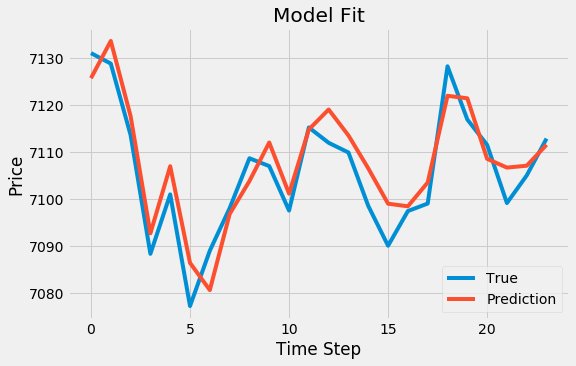

In [44]:
plt.figure(figsize=[8,5])
plt.title('Model Fit')
plt.xlabel('Time Step')
plt.ylabel('Price')
plt.plot(scaler.inverse_transform(testY), label='True')
plt.plot(scaler.inverse_transform(pred), label='Prediction')
plt.legend()

# Ridge Regression

In [45]:
from sklearn.linear_model import RidgeCV

In [46]:
ridge = RidgeCV()

In [47]:
ridge.fit(trainX,trainY)

Rpred = ridge.predict(testX)

In [48]:
testScore = np.sqrt(mean_squared_error(scaler.inverse_transform(testY),scaler.inverse_transform(Rpred)))
print('Test Score :',testScore)

Test Score : 5.434217735480924


In [49]:
print('RSquared :','{:.2%}'.format(r2_score(testY,Rpred)))

RSquared : 82.84%


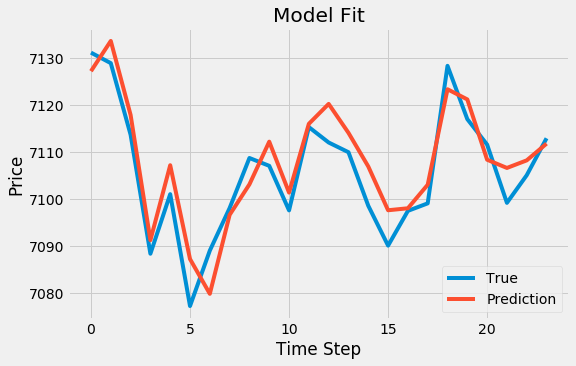

In [50]:
plt.figure(figsize=[8,5])
plt.title('Model Fit')
plt.xlabel('Time Step')
plt.ylabel('Price')
plt.plot(scaler.inverse_transform(testY), label='True')
plt.plot(scaler.inverse_transform(Rpred), label='Prediction')
plt.legend()

# Hyperparameter Tuning

In [51]:
normal_price = np.array([float(candles[i][4]) for i in range(500)])

In [52]:
data = pd.DataFrame(normal_price.reshape(100,5),columns=['First','Second','Third','Fourth','Target'])

In [53]:
data.head()

,First,Second,Third,Fourth,Target
0,6910.26,6886.50,6890.00,6889.12,6887.33
1,6885.06,6879.71,6889.70,6886.06,6884.39
2,6893.29,6900.50,6902.71,6890.02,6894.86
3,6911.46,6910.25,6938.97,6925.79,6924.10
4,6931.12,6948.16,6935.87,6931.47,6923.08


In [54]:
data.tail()

,First,Second,Third,Fourth,Target
95,7112.94,7108.80,7104.06,7107.46,7111.51
96,7107.37,7104.47,7102.10,7105.73,7099.11
97,7100.00,7106.27,7107.72,7106.03,7105.00
98,7107.27,7106.85,7106.00,7111.08,7112.86
99,7117.90,7117.19,7121.99,7119.23,7118.13


In [55]:
#75% train , 25% test

x_train_r = df.iloc[:74,:4]
y_train_r = df.iloc[:74,-1]

x_test_r = df.iloc[75:99,:4]
y_test_r = df.iloc[75:99,-1]

In [56]:
from tpot import TPOTRegressor

tpot = TPOTRegressor(generations=5, population_size=50, verbosity=2)
tpot.fit(x_train_r, y_train_r)

Generation 1 - Current best internal CV score: -0.015529174545694044
Generation 2 - Current best internal CV score: -0.015529174545694044
Generation 3 - Current best internal CV score: -0.015269257291595176
Generation 4 - Current best internal CV score: -0.014354302664793341
Generation 5 - Current best internal CV score: -0.014354302664793341

Best pipeline: LassoLarsCV(SelectPercentile(input_matrix, percentile=9), normalize=True)


TPOTRegressor(config_dict=None, crossover_rate=0.1, cv=5,
              disable_update_check=False, early_stop=None, generations=5,
              max_eval_time_mins=5, max_time_mins=None, memory=None,
              mutation_rate=0.9, n_jobs=1, offspring_size=None,
              periodic_checkpoint_folder=None, population_size=50,
              random_state=None, scoring=None, subsample=1.0, template=None,
              use_dask=False, verbosity=2, warm_start=False)

In [57]:
tpred = tpot.predict(x_test_r)

In [58]:
testScore = np.sqrt(mean_squared_error(y_test_r,tpred))
print('Test Score: %.2f RMSE' % (testScore))

print('RSquared :','{:.2%}'.format(r2_score(y_test_r,tpred)))

Test Score: 0.08 RMSE
RSquared : 81.66%


In [60]:
tpot.export('bitcoin.py')

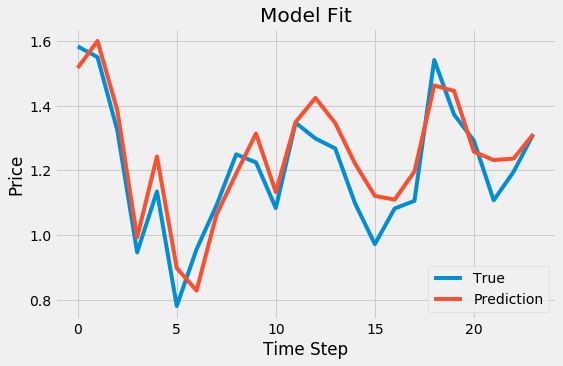

In [59]:
plt.figure(figsize=[8,5])
plt.title('Model Fit')
plt.xlabel('Time Step')
plt.ylabel('Price')
plt.plot(np.array(y_test_r).reshape(24,), label='True')
plt.plot(tpred, label='Prediction')
plt.legend()

# Trading Bot 

In [100]:
check = client.get_klines(symbol=symbol, interval=Client.KLINE_INTERVAL_1MINUTE)

check[499]

[1586180280000,
 '7073.16000000',
 '7074.64000000',
 '7072.27000000',
 '7074.64000000',
 '4.56162200',
 1586180339999,
 '32265.67388288',
 40,
 '1.95603700',
 '13835.73261344',
 '0']

In [101]:
index = [496,495,498,499]

candles = scaler.transform(np.array([float(check[i][4]) for i in index]).reshape(1,-1))

model_feed = candles.reshape(1,4,1)

scaler.inverse_transform(model.predict(model_feed)[0])[0] #at 7:08 PM prediction today 6th April 

7074.203

In [ ]:
#trading bot  
  
symbol = 'BTCUSDT'  #symbol  
quantity = '0.05'   #quantity to trade   
  
  
order = False  
index = [496,497,498,499]
  
while True:  
    price = client.get_recent_trades(symbol= symbol)
    candle = client.get_klines(symbol=symbol, interval=Client.KLINE_INTERVAL_1MINUTE)
    candles = scaler.transform(np.array([float(candle[i][4]) for i in index]).reshape(1,-1))
    model_feed = candles.reshape(1,4,1)
    
  
    if order == False and float(price[len(price)-1]['price']) < float(scaler.inverse_transform(model.predict(model_feed)[0])[0]):    
          
        #client.order_market_buy(symbol= symbol, quantity= quantity)                            
        order = True                                                                            
        buy_price = client.get_order_book(symbol=symbol)['asks'][0][0]                          
        print('Buy @Market Price :',float(buy_price),' Timestamp :',str(datetime.now()))        
  
    elif order == True and float(price[len(price)-1]['price'])-float(buy_price) >= 10:            
          
        #client.order_market_sell(symbol= symbol , quantity= quantity)                         #fires sell order to exhcange if conditionality satisfies  
        order = False                                                                          #sets order = False and closes open position  
        sell_price = client.get_order_book(symbol=symbol)['bids'][0][0]                        #gets the highest bid for the market order   
        print('Sell @Market Price :',float(sell_price),' Timestamp :',str(datetime.now()))     #print sell price and datetime   
  
    else:  
        pass  

Buy @Market Price : 7079.16  Timestamp : 2020-04-06 19:10:32.676675
Sell @Market Price : 7090.46  Timestamp : 2020-04-06 19:13:35.911250
Buy @Market Price : 7087.01  Timestamp : 2020-04-06 19:14:39.694150
Sell @Market Price : 7097.68  Timestamp : 2020-04-06 19:16:43.081978
Buy @Market Price : 7092.43  Timestamp : 2020-04-06 19:17:17.995969
Sell @Market Price : 7104.21  Timestamp : 2020-04-06 19:18:33.210025
Buy @Market Price : 7105.26  Timestamp : 2020-04-06 19:19:02.344101
